In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [2]:
train_normal = pd.read_csv('./data/normal_training.csv')

In [3]:
test_faulty = pd.read_csv('./data/faulty_testing.csv')

In [4]:
# data preparing
df_train = train_normal[(train_normal.simulationRun>=1)].iloc[:500,3:]

df_test = train_normal[(train_normal.simulationRun>5)&(train_normal.simulationRun<10)].iloc[:,3:].reset_index(drop=True)
# IDV = 1
# df_test = test_faulty[(test_faulty.faultNumber==IDV) & 
#                                (test_faulty.simulationRun==1)].iloc[:,3:]

In [5]:
def scl_pick(name, data):
    """
    the several option for name:
    -std
    -minmax
    -robust
    -norm
    -pwr
    """
    if name == 'std':
        std_scl = StandardScaler().fit(data)
        df_scl = std_scl.transform(data)
        df_scl = pd.DataFrame(df_scl)
    elif name == 'minmax':
        MM_scl = MinMaxScaler().fit(data)
        df_scl = MM_scl.transform(data)
        df_scl = pd.DataFrame(df_scl)
    elif name == 'robust':
        rb_scl = RobustScaler().fit(data)
        df_scl = rb_scl.transform(data)
        df_scl = pd.DataFrame(df_scl)
    elif name == 'norm': ##### xxxxxx
        df_norm = Normalizer().fit(data)
        df_scl = df_norm.transform(data)
        df_scl = pd.DataFrame(df_scl)
    else:
        pt_scl = PowerTransformer().fit(data)
        df_scl = pt_scl.transform(data)
        df_scl = pd.DataFrame(df_scl)
    return df_scl

In [6]:
#-std-minmax-robust-norm-pwr
x = scl_pick('std', df_train) 

In [7]:
x

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-0.007459,0.343859,0.502126,-1.431359,-0.084087,0.278542,-0.009557,-0.292773,0.510938,0.098431,...,-0.488936,0.000962,1.050090,-0.051818,-0.122736,1.319983,0.471559,-0.720571,0.279630,0.250397
1,0.017875,-0.103316,1.215653,1.035368,-0.866377,1.068875,0.107804,-0.032734,0.510938,-0.071378,...,-1.237481,-0.024152,-1.590601,-0.185906,0.049624,0.089123,-1.227605,-0.760505,0.460598,-0.634866
2,-0.007459,-0.075750,-0.821517,1.240929,-0.149278,-1.229449,0.308995,-0.467397,1.023929,-0.120262,...,0.901543,0.004238,0.029987,0.562959,0.098256,0.231510,0.029317,-0.740779,0.173916,1.722067
3,-0.029225,-0.045122,0.065220,1.685042,-0.694087,-1.261244,0.476653,0.392438,-0.515042,-0.128838,...,-0.030736,0.025713,-1.110695,0.302375,0.107554,-0.068286,0.381272,-0.649365,0.969458,-0.002535
4,1.550795,0.497001,-0.325151,-0.085064,-0.084087,1.404994,0.124570,0.703725,-0.515042,-0.918704,...,-0.684011,1.507821,-0.418568,-0.532509,-0.688446,1.199804,0.424744,-0.799476,0.725778,0.260288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.163035,-0.333028,-0.133843,1.615252,-1.429812,-0.130251,0.476653,-0.748315,-0.002052,-1.133966,...,0.391172,-0.360829,-1.326130,0.818484,-0.825761,-1.564979,-0.596009,0.429321,-0.080515,-1.161925
496,-0.571599,0.006947,0.515052,-0.010199,-0.163247,0.423891,-0.043088,0.200731,-0.002052,1.501493,...,0.155266,-0.683676,-0.539952,0.201177,2.053568,-0.086248,-1.668594,0.513518,0.424762,-0.464596
497,-0.710404,-0.195201,-0.428561,-0.596428,0.060264,0.887190,-0.680190,-0.142824,-0.515042,1.848829,...,1.146522,-0.544637,0.694782,-1.311733,1.699552,0.893150,0.064011,0.524584,0.313673,0.157137
498,-0.283998,-0.927219,0.308233,0.592525,0.227898,-0.107540,-0.411937,-0.222544,-1.541023,0.303401,...,1.298499,-0.461651,1.548485,1.273875,-0.392360,-0.127070,0.350758,0.627545,-0.976396,0.780990


In [8]:
y = x

In [9]:
x.shape

(500, 52)

### Trial and Error

In [10]:
np.power(x,2)

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.000056,0.118239,0.252131,2.048790,0.007071,0.077586,0.000091,0.085716,0.261058,0.009689,...,0.239058,9.261202e-07,1.102688,0.002685,0.015064,1.742356,0.222368,0.519223,0.078193,0.062699
1,0.000320,0.010674,1.477812,1.071988,0.750609,1.142495,0.011622,0.001072,0.261058,0.005095,...,1.531360,5.833173e-04,2.530011,0.034561,0.002463,0.007943,1.507015,0.578368,0.212150,0.403054
2,0.000056,0.005738,0.674891,1.539905,0.022284,1.511545,0.095478,0.218460,1.048430,0.014463,...,0.812780,1.796176e-05,0.000899,0.316923,0.009654,0.053597,0.000859,0.548753,0.030247,2.965515
3,0.000854,0.002036,0.004254,2.839365,0.481756,1.590737,0.227198,0.154007,0.265268,0.016599,...,0.000945,6.611424e-04,1.233642,0.091430,0.011568,0.004663,0.145368,0.421674,0.939849,0.000006
4,2.404964,0.247010,0.105723,0.007236,0.007071,1.974008,0.015518,0.495228,0.265268,0.844018,...,0.467872,2.273525e+00,0.175199,0.283566,0.473958,1.439529,0.180407,0.639162,0.526754,0.067750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.026580,0.110908,0.017914,2.609040,2.044362,0.016965,0.227198,0.559975,0.000004,1.285880,...,0.153015,1.301978e-01,1.758620,0.669917,0.681881,2.449158,0.355227,0.184316,0.006483,1.350071
496,0.326725,0.000048,0.265279,0.000104,0.026650,0.179684,0.001857,0.040293,0.000004,2.254483,...,0.024108,4.674124e-01,0.291548,0.040472,4.217142,0.007439,2.784206,0.263700,0.180423,0.215849
497,0.504674,0.038103,0.183664,0.355726,0.003632,0.787105,0.462659,0.020399,0.265268,3.418168,...,1.314512,2.966295e-01,0.482722,1.720645,2.888478,0.797717,0.004097,0.275188,0.098391,0.024692
498,0.080655,0.859735,0.095008,0.351086,0.051937,0.011565,0.169692,0.049526,2.374751,0.092052,...,1.686099,2.131213e-01,2.397805,1.622758,0.153946,0.016147,0.123031,0.393812,0.953349,0.609945


In [11]:
sx = np.power(x,2)

In [12]:
type(sx)
# need to change into numpy.ndarray

pandas.core.frame.DataFrame

In [13]:
sx = sx.to_numpy()

In [14]:
type(sx)

numpy.ndarray

In [15]:
# np.matrix.sum(sx)

In [16]:
# pip install pydist2
# pip.main(['install', 'pydist2'])

In [17]:
# pip --upgrade 
!pip install pydist2

  Cache entry deserialization failed, entry ignored
  Could not find a version that satisfies the requirement pydist2 (from versions: )
No matching distribution found for pydist2
You are using pip version 21.3.1, however version 22.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [18]:
# import pdist2

In [19]:
### POLYNOMIAL
poly = 0.1*x*x.T+0

In [20]:
poly.shape

(500, 500)

In [54]:
# np.power(poly,2)
# i will continue in spyder 

## Linear

In [22]:
lin = x@x.T

In [42]:
lin

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,11.254634,-1.006097,0.067399,-2.911136,7.180838,2.800996,0.005696,1.450963,0.406271,1.580191,...,0.593039,3.850171,-9.136394,4.291930,-3.399547,-10.671728,-3.103647,5.082999,-1.139681,-2.065223
1,-1.006097,15.648105,-1.643850,5.655817,2.590303,-0.440812,6.002199,4.606890,-2.434063,2.604167,...,0.910302,1.025712,-2.711872,0.154117,0.319368,8.139373,5.372732,-5.636426,-8.433953,-1.243001
2,0.067399,-1.643850,26.753057,17.878376,-0.314381,5.125456,3.053187,9.695625,-6.101215,3.928392,...,6.034873,5.882331,9.457952,-6.591729,5.767018,-1.737426,-1.248601,-3.118928,-1.144356,-3.652338
3,-2.911136,5.655817,17.878376,28.075591,-1.217920,1.028497,7.369408,7.878824,-6.396740,-0.043967,...,4.392604,5.631827,7.720344,0.811632,2.467457,7.440443,0.087824,-8.028105,-7.513966,1.320220
4,7.180838,2.590303,-0.314381,-1.217920,40.463249,34.783786,-1.699829,-4.665480,5.307867,4.026851,...,2.648738,6.922856,-7.399262,0.624002,1.256144,-2.809074,-0.029658,7.971182,-3.672549,2.661713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-10.671728,8.139373,-1.737426,7.440443,-2.809074,-4.698697,1.355132,-0.148896,3.515290,8.046493,...,-0.764045,-4.210899,3.461888,-6.719312,18.034202,40.463401,7.860271,-8.157611,4.955096,8.035931
496,-3.103647,5.372732,-1.248601,0.087824,-0.029658,-1.633637,-1.137229,0.502417,-8.135956,-5.761141,...,2.461151,2.056640,3.404392,-1.032472,-0.650834,7.860271,29.333470,19.186341,0.828928,-3.457594
497,5.082999,-5.636426,-3.118928,-8.028105,7.971182,2.713818,-6.155890,-6.842317,-4.205185,-12.150855,...,-2.619284,4.995748,6.710797,11.294084,-6.044172,-8.157611,19.186341,36.603012,9.409031,3.965179
498,-1.139681,-8.433953,-1.144356,-7.513966,-3.672549,-1.293656,-4.383462,-4.969577,2.194989,-4.847208,...,-4.139085,-8.862680,6.183725,-2.552092,6.351287,4.955096,0.828928,9.409031,33.992203,24.623654


In [49]:
lin.describe()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,...,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,-4.882423e-13,-4.331895e-13,-9.015935e-13,4.594938e-13,5.265974e-13,3.231548e-13,4.129106e-13,-9.868018e-13,1.271275e-12,-1.953765e-12,...,-4.745573e-13,-1.921222e-12,3.376499e-13,-2.477236e-13,-8.975576e-14,1.234355e-13,8.111556e-14,2.979732e-13,1.228614e-12,4.305321e-13
std,4.716524e+00,4.778649e+00,6.338038e+00,5.651331e+00,8.554545e+00,9.754645e+00,5.573037e+00,6.049014e+00,7.569132e+00,1.008295e+01,...,7.993475e+00,9.196392e+00,8.720044e+00,1.061736e+01,7.633776e+00,8.500852e+00,7.238600e+00,7.614222e+00,6.203727e+00,8.544686e+00
min,-1.583659e+01,-1.687460e+01,-1.642913e+01,-1.530054e+01,-3.442024e+01,-3.172695e+01,-1.545492e+01,-1.899654e+01,-1.810157e+01,-2.842067e+01,...,-2.505040e+01,-2.298760e+01,-2.468787e+01,-3.567952e+01,-2.424828e+01,-2.504012e+01,-1.976989e+01,-2.541813e+01,-1.965804e+01,-3.084648e+01
25%,-3.008397e+00,-3.057855e+00,-3.969573e+00,-3.902961e+00,-5.385980e+00,-5.801977e+00,-3.510588e+00,-3.922582e+00,-5.057770e+00,-7.201864e+00,...,-4.905231e+00,-6.303238e+00,-5.589354e+00,-6.736356e+00,-4.846433e+00,-5.262711e+00,-4.699101e+00,-5.278079e+00,-4.239495e+00,-5.585520e+00
50%,5.325165e-03,-1.413585e-01,-2.523802e-01,-8.621058e-03,4.627394e-02,1.081094e-01,-1.812943e-01,9.187919e-02,-3.250027e-01,2.442891e-01,...,-1.678317e-02,3.996536e-01,-4.203533e-01,-1.308644e-01,-4.648557e-01,-5.321977e-01,-8.581737e-02,3.204284e-01,-4.339646e-03,5.841747e-02
75%,3.211763e+00,3.597435e+00,3.942971e+00,3.662164e+00,5.231904e+00,6.651532e+00,3.576924e+00,3.628681e+00,4.594958e+00,6.551037e+00,...,4.842445e+00,5.660645e+00,5.393087e+00,5.708735e+00,4.982327e+00,5.677667e+00,4.547684e+00,4.603735e+00,4.218490e+00,4.721765e+00
max,1.468455e+01,1.565211e+01,2.675306e+01,2.807559e+01,4.046325e+01,6.019564e+01,2.828130e+01,3.144206e+01,4.585478e+01,5.270524e+01,...,4.135756e+01,4.666928e+01,5.914190e+01,6.539987e+01,4.117686e+01,4.046340e+01,2.933347e+01,3.660301e+01,3.399220e+01,5.190513e+01


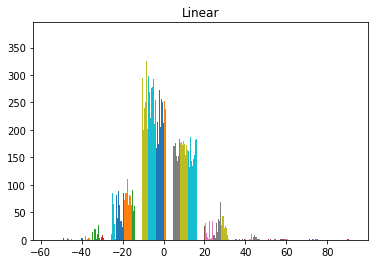

In [23]:
plt.hist(lin)
plt.title('Linear')
plt.show()

## Gaussian

In [24]:
from sklearn.metrics import pairwise_distances

In [25]:
pdist_gs = pairwise_distances(x, x, metric='sqeuclidean')

In [26]:
gamma = 0.1
gaus = np.exp(-gamma*pdist_gs)

In [40]:
gaus

array([[1.00000000e+00, 5.54932851e-02, 2.26569364e-02, ...,
        2.30713244e-02, 8.62905812e-03, 1.19570302e-03],
       [5.54932851e-02, 1.00000000e+00, 1.03695024e-02, ...,
        1.74256530e-03, 1.29295960e-03, 9.08310915e-04],
       [2.26569364e-02, 1.03695024e-02, 1.00000000e+00, ...,
        9.49673322e-04, 1.83007699e-03, 1.84790770e-04],
       ...,
       [2.30713244e-02, 1.74256530e-03, 9.49673322e-04, ...,
        1.00000000e+00, 5.64087945e-03, 3.16629433e-04],
       [8.62905812e-03, 1.29295960e-03, 1.83007699e-03, ...,
        5.64087945e-03, 1.00000000e+00, 2.56041057e-02],
       [1.19570302e-03, 9.08310915e-04, 1.84790770e-04, ...,
        3.16629433e-04, 2.56041057e-02, 1.00000000e+00]])

In [46]:
gauss = pd.DataFrame(gaus)

In [47]:
gauss

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,0.055493,0.022657,0.010941,0.023858,0.001381,0.019208,0.018695,0.003590,0.002288,...,0.005842,0.006589,0.000141,0.001106,0.002677,0.000671,0.009283,0.023071,0.008629,0.001196
1,0.055493,1.000000,0.010370,0.039117,0.006139,0.000465,0.041069,0.022649,0.001311,0.001810,...,0.004012,0.002414,0.000328,0.000312,0.003630,0.018625,0.032595,0.001743,0.001293,0.000908
2,0.022657,0.010370,1.000000,0.148497,0.001131,0.000467,0.007500,0.020643,0.000207,0.000777,...,0.003683,0.002100,0.001233,0.000027,0.003554,0.000851,0.002856,0.000950,0.001830,0.000185
3,0.010941,0.039117,0.148497,1.000000,0.000827,0.000180,0.015579,0.012576,0.000171,0.000308,...,0.002323,0.001750,0.000763,0.000103,0.001610,0.004674,0.003269,0.000312,0.000449,0.000438
4,0.023858,0.006139,0.001131,0.000827,1.000000,0.044640,0.000736,0.000296,0.000516,0.000201,...,0.000475,0.000656,0.000011,0.000029,0.000366,0.000174,0.000925,0.002215,0.000280,0.000166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.000671,0.018625,0.000851,0.004674,0.000174,0.000017,0.001356,0.000732,0.000360,0.000449,...,0.000240,0.000071,0.000094,0.000007,0.010492,1.000000,0.004482,0.000088,0.001573,0.000486
496,0.009283,0.032595,0.002856,0.003269,0.000925,0.000093,0.002506,0.002536,0.000107,0.000086,...,0.001392,0.000755,0.000284,0.000063,0.000761,0.004482,1.000000,0.063521,0.002098,0.000148
497,0.023071,0.001743,0.000950,0.000312,0.002215,0.000108,0.000444,0.000282,0.000113,0.000012,...,0.000244,0.000657,0.000266,0.000356,0.000125,0.000088,0.063521,1.000000,0.005641,0.000317
498,0.008629,0.001293,0.001830,0.000449,0.000280,0.000063,0.000822,0.000533,0.000528,0.000065,...,0.000233,0.000053,0.000311,0.000029,0.001937,0.001573,0.002098,0.005641,1.000000,0.025604


In [48]:
gauss.describe()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,500.000000,500.000000,5.000000e+02,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,...,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,5.000000e+02,5.000000e+02,5.000000e+02
mean,0.007643,0.006147,3.770046e-03,0.003548,2.697924e-03,2.183755e-03,3.704658e-03,3.338726e-03,2.304868e-03,2.230997e-03,...,2.709166e-03,2.584722e-03,2.101332e-03,2.075025e-03,2.410592e-03,2.546248e-03,0.003263,2.703533e-03,2.663017e-03,2.204626e-03
std,0.045408,0.045235,4.524165e-02,0.045228,4.477803e-02,4.475828e-02,4.509647e-02,4.504931e-02,4.471494e-02,4.471741e-02,...,4.511977e-02,4.512131e-02,4.471812e-02,4.471872e-02,4.471439e-02,4.472333e-02,0.044828,4.480229e-02,4.472082e-02,4.472793e-02
min,0.000002,0.000004,3.973569e-07,0.000001,2.235932e-09,5.326324e-10,4.237044e-07,2.895562e-07,5.710573e-08,5.066626e-09,...,8.128776e-08,7.879990e-08,1.669235e-08,7.191638e-10,1.044258e-07,3.388486e-08,0.000001,1.476683e-07,1.552464e-07,2.762215e-09
25%,0.000634,0.000366,1.072895e-04,0.000112,2.541412e-05,2.907894e-06,9.785189e-05,6.527118e-05,1.428376e-05,6.311115e-06,...,2.466922e-05,1.131402e-05,3.538816e-06,1.697858e-06,2.895548e-05,2.358221e-05,0.000085,4.782000e-05,6.271186e-05,7.060556e-06
50%,0.001964,0.001200,4.584289e-04,0.000370,1.169568e-04,1.727896e-05,3.891686e-04,2.583178e-04,6.407775e-05,3.076068e-05,...,1.084518e-04,6.159171e-05,1.612817e-05,1.017123e-05,8.543799e-05,1.072869e-04,0.000309,1.496967e-04,2.077336e-04,3.549803e-05
75%,0.006859,0.003877,1.450206e-03,0.001215,4.568765e-04,7.682962e-05,1.143710e-03,9.197712e-04,2.296619e-04,1.510149e-04,...,3.359013e-04,2.424878e-04,7.155696e-05,4.269831e-05,3.452386e-04,4.224034e-04,0.001108,5.130982e-04,5.946243e-04,1.598879e-04
max,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00


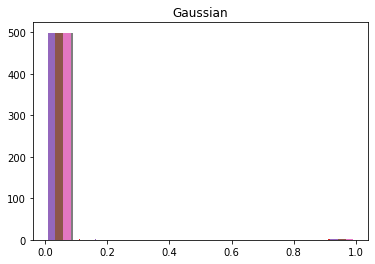

In [27]:
plt.hist(gaus)
plt.title('Gaussian')
plt.show()

## Polynomial

In [29]:
offset = 0

In [30]:
poly = gamma*x@x.T+offset

In [31]:
powr = np.power(poly,2)

In [32]:
fpoly = poly+powr

In [41]:
fpoly

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,2.392131,-0.090487,0.006785,-0.206366,1.233728,0.358555,0.000570,0.166149,0.042278,0.182989,...,0.062821,0.533255,-0.078902,0.613400,-0.224386,0.071685,-0.214038,0.766669,-0.100979,-0.163871
1,-0.090487,4.013442,-0.137363,0.885464,0.326127,-0.042138,0.960484,0.672923,-0.184160,0.328234,...,0.099317,0.113092,-0.197645,0.015649,0.032957,1.476431,0.825936,-0.245950,-0.132080,-0.108850
2,0.006785,-0.137363,9.832566,4.984201,-0.030450,0.775249,0.398538,1.909614,-0.237873,0.547162,...,0.967684,0.934251,1.840324,-0.224664,0.909287,-0.143556,-0.109270,-0.214616,-0.101340,-0.231838
3,-0.206366,0.885464,4.984201,10.689947,-0.106959,0.113428,1.280023,1.408641,-0.230491,-0.004377,...,0.632210,0.880358,1.368072,0.087751,0.307629,1.297646,0.008860,-0.158306,-0.186800,0.149452
4,1.233728,0.326127,-0.030450,-0.106959,20.419070,15.577496,-0.141089,-0.248881,0.812521,0.564840,...,0.335032,1.171545,-0.192435,0.066294,0.141393,-0.201998,-0.002957,1.432516,-0.232379,0.337018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.071685,1.476431,-0.143556,1.297646,-0.201998,-0.249092,0.153877,-0.014668,0.475102,1.452110,...,-0.070567,-0.243773,0.466035,-0.220440,5.055745,20.419208,1.403866,-0.150295,0.741039,1.449355
496,-0.214038,0.825936,-0.109270,0.008860,-0.002957,-0.136676,-0.100790,0.052766,-0.151658,-0.244207,...,0.306688,0.247962,0.456338,-0.092587,-0.060848,1.403866,11.537871,5.599791,0.089764,-0.226210
497,0.766669,-0.245950,-0.214616,-0.158306,1.432516,0.345030,-0.236639,-0.216059,-0.243683,0.261347,...,-0.193322,0.749150,1.121428,2.404972,-0.239097,-0.150295,5.599791,17.058106,1.826202,0.553744
498,-0.100979,-0.132080,-0.101340,-0.186800,-0.232379,-0.112630,-0.246199,-0.249991,0.267679,-0.249767,...,-0.242588,-0.100797,1.000757,-0.190077,1.038517,0.741039,0.089764,1.826202,14.953919,8.525609


In [50]:
fpoly.describe()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.222011,0.227898,0.400904,0.318737,0.730339,0.949628,0.309966,0.365174,0.571772,1.014625,...,0.637679,0.844045,0.758871,1.125029,0.581580,0.721200,0.522925,0.578604,0.384093,0.728656
std,0.530682,0.585550,0.952406,0.824955,1.665588,2.395340,0.854970,0.942982,1.613761,2.165067,...,1.588066,1.951483,2.274054,2.904321,1.438850,1.526570,1.265990,1.337572,1.048933,1.923816
min,-0.249997,-0.249998,-0.249912,-0.249998,-0.249908,-0.249999,-0.249998,-0.249994,-0.250000,-0.250000,...,-0.249992,-0.249999,-0.249996,-0.249998,-0.250000,-0.249996,-0.249998,-0.249994,-0.250000,-0.250000
25%,-0.176779,-0.184469,-0.173881,-0.176964,-0.141147,-0.129112,-0.186116,-0.169173,-0.175927,-0.111915,...,-0.153756,-0.115549,-0.162483,-0.130779,-0.182547,-0.165821,-0.179325,-0.158530,-0.181674,-0.153066
50%,0.017997,0.009263,0.032598,0.028375,0.204184,0.282699,0.023049,0.052997,0.079547,0.376883,...,0.147937,0.246634,0.190500,0.269738,0.091276,0.210233,0.091973,0.116188,0.069942,0.198612
75%,0.438795,0.495984,0.579916,0.513235,0.954651,1.343130,0.487042,0.527531,0.731709,1.326681,...,0.852241,1.133046,0.940777,1.385621,0.860188,1.014257,0.746480,0.784059,0.615388,0.847324
max,3.624813,4.015095,9.832566,10.689947,20.419070,42.254721,10.826448,13.030235,25.612084,33.048951,...,21.240230,26.447141,40.891832,49.311418,21.073020,20.419208,11.537871,17.058106,14.953919,32.131939


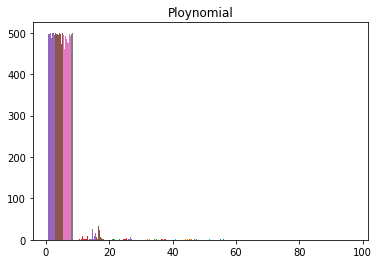

In [33]:
plt.hist(fpoly)
plt.title('Ploynomial')
plt.show()

## Sigmoid

In [34]:
sig = gamma*x@x.T+offset

In [35]:
fsig = np.tanh(sig)

In [43]:
fsig

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.809461,-0.100272,0.006740,-0.283159,0.615721,0.272997,0.000570,0.144087,0.040605,0.156717,...,0.059234,0.367057,-0.722874,0.404647,-0.327437,-0.788394,-0.300769,0.468619,-0.113477,-0.203635
1,-0.100272,0.916196,-0.162920,0.512107,0.253388,-0.044053,0.537206,0.430646,-0.238711,0.254685,...,0.090780,0.102213,-0.264729,0.015411,0.031926,0.671757,0.490921,-0.510675,-0.687603,-0.123664
2,0.006740,-0.162920,0.990554,0.945532,-0.031428,0.471926,0.296172,0.748512,-0.544213,0.373805,...,0.539526,0.528624,0.737874,-0.577813,0.520264,-0.172015,-0.124215,-0.302158,-0.113939,-0.349816
3,-0.283159,0.512107,0.945532,0.992742,-0.121193,0.102489,0.627293,0.657208,-0.564678,-0.004397,...,0.413031,0.510335,0.648111,0.080985,0.241857,0.631582,0.008782,-0.665605,-0.635981,0.131260
4,0.615721,0.253388,-0.031428,-0.121193,0.999389,0.998097,-0.168364,-0.435406,0.485982,0.382244,...,0.258848,0.599448,-0.629101,0.062319,0.124958,-0.273745,-0.002966,0.662423,-0.351588,0.260059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.788394,0.671757,-0.172015,0.631582,-0.273745,-0.438094,0.134690,-0.014888,0.337731,0.666628,...,-0.076256,-0.397848,0.332991,-0.586249,0.947159,0.999389,0.656153,-0.672756,0.458578,0.666041
496,-0.300769,0.490921,-0.124215,0.008782,-0.002966,-0.161926,-0.113235,0.050199,-0.671569,-0.519835,...,0.241263,0.202812,0.327869,-0.102882,-0.064992,0.656153,0.994352,0.957805,0.082703,-0.332609
497,0.468619,-0.510675,-0.302158,-0.665605,0.662423,0.264910,-0.548049,-0.594264,-0.397367,-0.838198,...,-0.256098,0.461783,0.585690,0.810817,-0.540185,-0.672756,0.957805,0.998677,0.735637,0.376966
498,-0.113477,-0.687603,-0.113939,-0.635981,-0.351588,-0.128649,-0.412273,-0.459721,0.216040,-0.450016,...,-0.391786,-0.709546,0.549994,-0.249809,0.561574,0.458578,0.082703,0.735637,0.997771,0.985575


In [51]:
fsig.describe()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.003731,-0.000365,-0.005999,-0.002587,0.000425,0.002289,-0.005517,-0.001081,-0.016101,-0.005375,...,0.000614,-0.002959,-0.011315,-0.013321,-0.009317,-0.003756,-0.009283,-0.002067,-0.003130,-0.005893
std,0.399509,0.402509,0.483539,0.452010,0.565446,0.610792,0.442541,0.464827,0.529995,0.632379,...,0.540321,0.590600,0.569476,0.622941,0.538040,0.573844,0.518277,0.532513,0.476441,0.564447
min,-0.919171,-0.933823,-0.927879,-0.910434,-0.997954,-0.996497,-0.913039,-0.956208,-0.947848,-0.993224,...,-0.986748,-0.980047,-0.985758,-0.998409,-0.984460,-0.986721,-0.962365,-0.987682,-0.961530,-0.995823
25%,-0.292080,-0.296598,-0.377342,-0.371615,-0.491926,-0.522809,-0.337314,-0.373304,-0.466646,-0.617025,...,-0.454631,-0.558275,-0.507184,-0.587363,-0.449954,-0.482523,-0.438126,-0.483698,-0.400250,-0.506898
50%,0.000533,-0.014135,-0.025233,-0.000862,0.004627,0.010810,-0.018127,0.009188,-0.032489,0.024424,...,-0.001678,0.039944,-0.042011,-0.013086,-0.046452,-0.053169,-0.008582,0.032032,-0.000434,0.005842
75%,0.310570,0.344988,0.375059,0.350676,0.480157,0.581782,0.343180,0.347738,0.429673,0.575096,...,0.449633,0.512463,0.492464,0.516000,0.460726,0.513717,0.425810,0.430388,0.398487,0.439952
max,0.899282,0.916261,0.990554,0.992742,0.999389,0.999988,0.993033,0.996291,0.999792,0.999947,...,0.999489,0.999823,0.999985,0.999996,0.999470,0.999389,0.994352,0.998677,0.997771,0.999938


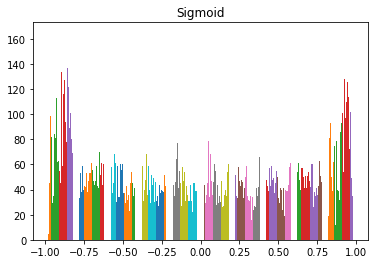

In [36]:
plt.hist(fsig)
plt.title('Sigmoid')
plt.show()

## Laplacian

In [37]:
pdist_lap = pairwise_distances(x, x, metric='cityblock')

In [38]:
lap = np.exp(-gamma*pdist_lap)

In [44]:
lap

array([[1.        , 0.12385963, 0.04270939, ..., 0.02676804, 0.02127469,
        0.01226559],
       [0.12385963, 1.        , 0.04111156, ..., 0.00918331, 0.00989429,
        0.01388459],
       [0.04270939, 0.04111156, 1.        , ..., 0.00814666, 0.00979866,
        0.00472473],
       ...,
       [0.02676804, 0.00918331, 0.00814666, ..., 1.        , 0.02491408,
        0.00782337],
       [0.02127469, 0.00989429, 0.00979866, ..., 0.02491408, 1.        ,
        0.09064378],
       [0.01226559, 0.01388459, 0.00472473, ..., 0.00782337, 0.09064378,
        1.        ]])

In [52]:
lapc = pd.DataFrame(lap)

In [53]:
lapc.describe()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.015349,0.013499,0.010068,0.009632,0.007772,0.005336,0.009788,0.009057,0.006531,0.005760,...,0.006997,0.006444,0.005039,0.004592,0.006661,0.006687,0.008961,0.007559,0.007845,0.005677
std,0.045332,0.045302,0.045405,0.045392,0.044881,0.044821,0.045187,0.045136,0.044722,0.044748,...,0.045108,0.045104,0.044664,0.044673,0.044665,0.044674,0.044872,0.044834,0.044770,0.044790
min,0.001116,0.001134,0.000735,0.000913,0.000261,0.000271,0.001019,0.000809,0.000359,0.000273,...,0.000323,0.000373,0.000372,0.000203,0.000526,0.000354,0.001000,0.000649,0.000598,0.000282
25%,0.006919,0.005758,0.003911,0.003840,0.002560,0.001458,0.003855,0.003445,0.002171,0.001688,...,0.002450,0.002014,0.001488,0.001266,0.002555,0.002279,0.003457,0.002824,0.003248,0.001853
50%,0.010391,0.008897,0.006302,0.005868,0.004514,0.002463,0.006016,0.005261,0.003593,0.002764,...,0.003850,0.003267,0.002453,0.002095,0.003671,0.003709,0.005440,0.004367,0.004845,0.002965
75%,0.017569,0.014048,0.009938,0.009462,0.007233,0.004259,0.009410,0.008770,0.005695,0.004673,...,0.005923,0.005745,0.003767,0.003303,0.005581,0.005990,0.008572,0.006820,0.007098,0.004469
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


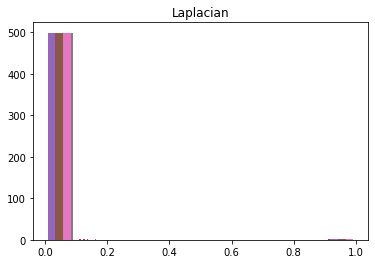

In [39]:
plt.hist(lap)
plt.title('Laplacian')
plt.show()